# Loan Prediction 03 - Training and Validation of first models

We propose two models of different nature to predict the Loan approval: Logistic Regression and Random Forest.

- Forest Based Algorithms: Flexibility treating variance in data; Can handle categorical and numerical data; Can handle missing data; Can overcome multicollinearity;
- Regressors: can show direct relationship between inputs and output; Variable Selection;

Now, let us train and validate our models with the preprocessed dataset

In [65]:
import sys
sys.path.append('utils')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.style.use('seaborn')


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import metrics_utils 
import model_utils

In [66]:
df_import = pd.read_csv('dataset/train_loan_preprocessed.csv')
print(df_import.shape)
display(df_import.head(10))

(553, 14)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Base_Loan_Installment,Remaining_Income
0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0,359.111111,0.941042
1,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0,185.166667,0.938278
2,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0,336.666667,0.931863
3,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0,395.583333,0.934069
4,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0,749.083333,0.922076
5,1.0,1.0,0.0,1.0,0.0,2333,1516.0,95.0,360.0,1.0,2.0,1.0,266.527778,0.930754
6,1.0,1.0,3.0,0.0,0.0,3036,2504.0,158.0,360.0,0.0,1.0,0.0,443.277778,0.919986
7,1.0,1.0,2.0,0.0,0.0,4006,1526.0,168.0,360.0,1.0,2.0,1.0,471.333333,0.914799
8,1.0,1.0,1.0,0.0,0.0,12841,10968.0,349.0,360.0,1.0,1.0,0.0,979.138889,0.958875
9,1.0,1.0,2.0,0.0,0.0,3200,700.0,70.0,360.0,1.0,2.0,1.0,196.388889,0.949644


In [67]:
columns_x = df_import.drop(columns=['Loan_Status']).columns
column_y = ['Loan_Status']

X_train, X_validation, y_train, y_validation = train_test_split(
    df_import[columns_x], df_import[column_y],  test_size=0.20, random_state=42)

In [68]:
scaler = StandardScaler()
scaler.fit(df_import[columns_x])

X_train_norm = pd.DataFrame(data=scaler.transform(X_train),columns=X_train.columns)
X_validation_norm = pd.DataFrame(data=scaler.transform(X_validation),columns=X_train.columns)

In [69]:
display(X_train_norm.describe())
print(X_train_norm.shape)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Base_Loan_Installment,Remaining_Income
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,-0.016647,0.014505,0.004280,-0.009536,-0.037299,0.045479,-0.069764,0.008492,-0.002740,0.006133,-0.013292,0.013893,-0.015282
std,1.014213,0.996477,1.003046,0.994258,0.958495,1.095308,0.656804,1.043754,0.997956,0.996850,0.999270,1.083265,1.099683
min,-2.077813,-1.360337,-0.759148,-0.515215,-0.386896,-0.862414,-0.545638,-1.631440,-5.033329,-1.909727,-1.307359,-0.857447,-14.078281
25%,0.481275,-1.360337,-0.759148,-0.515215,-0.386896,-0.401469,-0.545638,-0.547797,0.279961,0.523635,-1.307359,-0.363801,-0.052456
50%,0.481275,0.735112,-0.759148,-0.515215,-0.386896,-0.251008,-0.206571,-0.238185,0.279961,0.523635,-0.027767,-0.222009,0.101826
75%,0.481275,0.735112,1.225764,-0.515215,-0.386896,0.098906,0.187665,0.208371,0.279961,0.523635,1.251825,0.040569,0.261363
max,0.481275,0.735112,2.218219,1.940938,2.584677,12.692880,6.031805,6.001693,2.112129,0.523635,1.251825,16.582953,0.852898


(442, 13)


In [70]:
display(X_validation_norm.describe())
print(X_validation_norm.shape)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Base_Loan_Installment,Remaining_Income
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.066288,-0.057760,-0.017041,0.037973,0.148523,-0.181098,0.277799,-0.033815,0.010912,-0.024420,0.052928,-0.055322,0.060854
std,0.947557,1.020865,0.996673,1.030663,1.147266,0.419714,1.788953,0.811318,1.017058,1.021100,1.010197,0.564702,0.417608
min,-2.077813,-1.360337,-0.759148,-0.515215,-0.386896,-0.872481,-0.545638,-1.440909,-3.934027,-1.909727,-1.307359,-0.673642,-2.469802
25%,0.481275,-1.360337,-0.759148,-0.515215,-0.386896,-0.461410,-0.545638,-0.559705,0.279961,0.523635,-1.307359,-0.382181,-0.023325
50%,0.481275,0.735112,-0.759148,-0.515215,-0.386896,-0.310404,-0.038517,-0.178644,0.279961,0.523635,-0.027767,-0.211506,0.134568
75%,0.481275,0.735112,1.225764,-0.515215,-0.386896,-0.044718,0.331299,0.470351,0.279961,0.523635,1.251825,0.087832,0.281234
max,0.481275,0.735112,2.218219,1.940938,2.584677,1.549149,13.157478,3.453346,2.112129,0.523635,1.251825,2.966432,0.860009


(111, 13)


### Logistic Regression Classifier

In [71]:
lr = LogisticRegression(random_state=0,solver='lbfgs');
lr.fit(X_train_norm.values,y_train.values.ravel());
df_result = model_utils.predict(lr,X_validation_norm,y_validation);

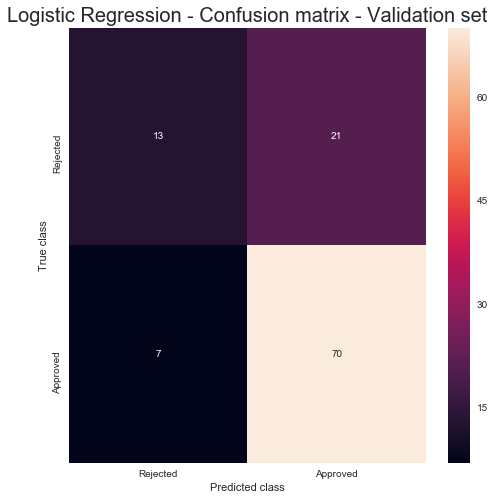

              precision    recall  f1-score   support

    Rejected       0.65      0.38      0.48        34
    Approved       0.77      0.91      0.83        77

    accuracy                           0.75       111
   macro avg       0.71      0.65      0.66       111
weighted avg       0.73      0.75      0.73       111

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.575


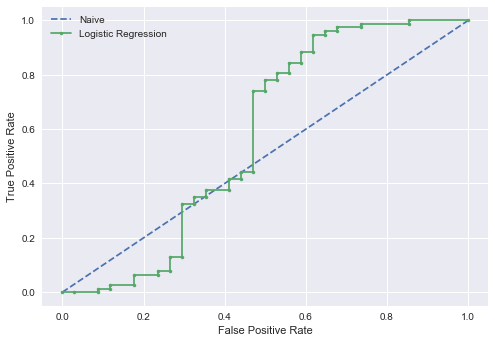

In [72]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,'Logistic Regression')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = lr,model_name = 'Logistic Regression',X_test = X_validation_norm, y_test = y_validation)

### Ridge Regressor Classification

In [73]:
ridge = RidgeClassifier(random_state=0);
ridge.fit(X_train_norm.values,y_train.values.ravel());
df_result = model_utils.predict(ridge,X_validation_norm,y_validation);

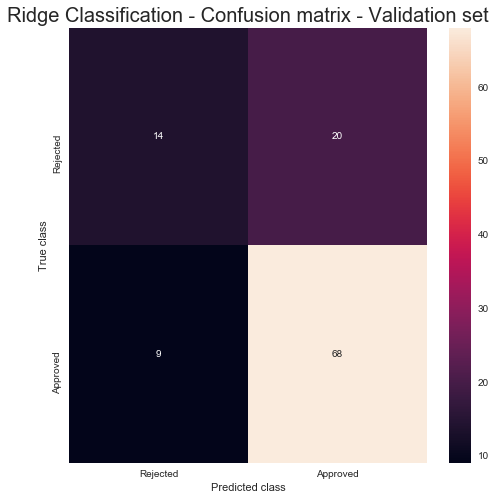

              precision    recall  f1-score   support

    Rejected       0.61      0.41      0.49        34
    Approved       0.77      0.88      0.82        77

    accuracy                           0.74       111
   macro avg       0.69      0.65      0.66       111
weighted avg       0.72      0.74      0.72       111



In [74]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,'Ridge Classification')
metrics_utils.show_performance(df_result)
# metrics_utils.plot_ROC(model = ridge,model_name = 'Ridge Classification',X_test = X_validation_norm, y_test = y_validation)

### Random Forest Classifier

In [63]:
rfc = RandomForestClassifier(
            n_estimators = 500,
            min_samples_split = 2,
            max_depth = 13,
            random_state = 0)
rfc.fit(X_train_norm.values,y_train.values.ravel())
df_result = model_utils.predict(rfc,X_validation_norm,y_validation)

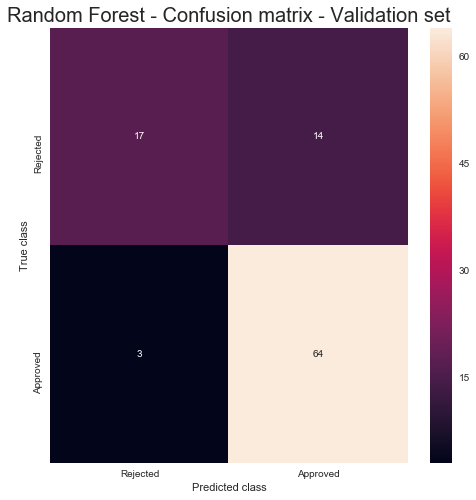

              precision    recall  f1-score   support

    Rejected       0.85      0.55      0.67        31
    Approved       0.82      0.96      0.88        67

    accuracy                           0.83        98
   macro avg       0.84      0.75      0.77        98
weighted avg       0.83      0.83      0.81        98

No Skill: ROC AUC=0.500
Random Forest : ROC AUC=0.802


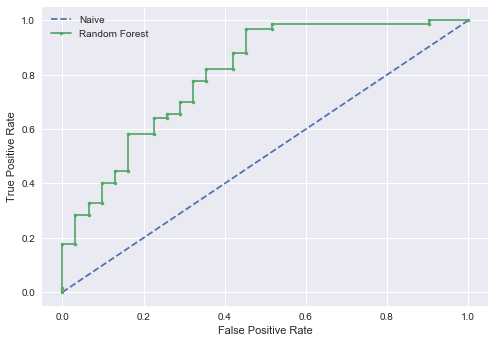

In [64]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,title = 'Random Forest')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = rfc,model_name = 'Random Forest',X_test = X_validation_norm, y_test = y_validation)

### Gradient Boosting

In [51]:
gboost = GradientBoostingClassifier(
            n_estimators = 200,
            min_samples_split = 3,
            random_state = 0)
gboost.fit(X_train_norm.values,y_train.values.ravel())
df_result = model_utils.predict(gboost,X_validation_norm,y_validation)

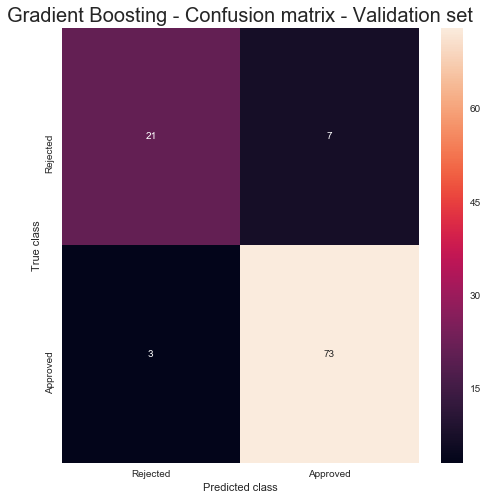

              precision    recall  f1-score   support

    Rejected       0.88      0.75      0.81        28
    Approved       0.91      0.96      0.94        76

    accuracy                           0.90       104
   macro avg       0.89      0.86      0.87       104
weighted avg       0.90      0.90      0.90       104

No Skill: ROC AUC=0.500
Gradient Boosting : ROC AUC=0.890


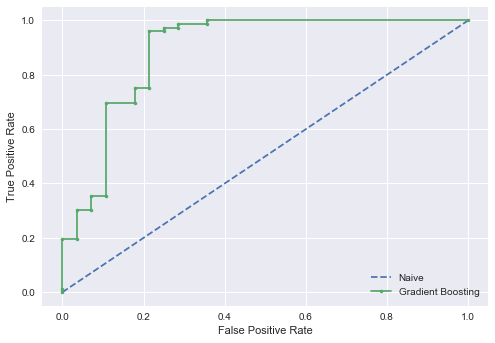

In [52]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,title = 'Gradient Boosting')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = gboost,model_name = 'Gradient Boosting',X_test = X_validation_norm, y_test = y_validation)

In [ ]:
#TODO: Execute a small grid search to tune models
#TODO: Execute grid search with CROSS VALIDATION
#TODO: Apply a RFE wrapper to check for variable selection
#TODO: Apply other models

### Conclusion

The best performing classifiers were the Random Forest and Gradient Boosting. 

We can point out the Random Forest had a more sensity outcome than the Gradient Boosting. 

The regression models had slightly inferior performance, but still had a good performance.

Let us see (in the next notebooks) how these models will perform when the missing data is filled by a Random Forest algorithm.